# Retrieval Practice and Learning

What is the most effective way to learn a subject? Many students focus exclusively on the _encoding_ process---that is, how to get the knowledge into memory in the first place. For example, taking notes is an activity for encoding knowledge.

_Retrieval_, on the other hand, is the process of reconstructing that knowledge from memory. [Karpicke and Blunt](http://science.sciencemag.org/content/331/6018/772) (2011) demonstrated that _retrieval_ is more effective for learning than activites designed to promote effective encoding. They conducted an experiment in which subjects had to learn about sea otters by reading a passage. Subjects were randomly assigned to one of two conditions: some were instructed to create a [concept map](https://en.wikipedia.org/wiki/Concept_map) as they read the passage, while others were instructed to practice retrieval (i.e., read the passage, recall as much as they could, read the text again, and recall again). The two main measurements they recorded were:

1. each subject's score on a follow-up learning test one week later
2. each subject's _prediction_ of how well they would do on that test

In this lab, you will analyze data from a _replication_ of Karpicke and Blunt's experiment, conducted by Buttrick _et al_.
- The data file is : data.csv.
- The codebook (explaining what the variables mean) is : codebook.csv.

In [1]:
# READ IN THE DATA SET HERE
import pandas as pd

# Allow for multiple outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

df = pd.read_csv("data.csv")
df.head()

,ID,Age,Gender,Date.P1,Date.P2,Condition,IC.1,IC.2,Comp.1,Comp.2,...,Scorer.2.2,R2CS.avg,TS.1,Scorer.1.3,TS.2,Scorer.2.3,TS.avg,Exc.1,Exc.2,Collection
0,KB1,18,Female,11/21/16,11/28/16,Concept,1,1,1,1,...,NaN,NaN,0.36,NK,0.42,MS,0.39,0,0,1
1,KB2,18,Male,11/21/16,11/28/16,Concept,1,1,1,1,...,NaN,NaN,0.48,MS,0.36,NK,0.42,0,0,1
2,KB3,18,Male,11/21/16,11/28/16,Concept,1,1,1,1,...,NaN,NaN,0.08,NK,0.08,MS,0.08,0,0,1
3,KB4,19,Female,11/21/16,11/28/16,Concept,1,1,1,1,...,NaN,NaN,0.44,MS,0.42,NK,0.43,0,0,1
4,KB5,19,Female,11/22/16,11/29/16,Concept,1,1,1,1,...,NaN,NaN,0.26,NK,0.28,MS,0.27,0,0,1


# Question 1

Which group felt like they learned more: the subjects who made concept maps or the ones who practiced retrieval? (Or are they about the same?) Make an appropriate visualization and explain what you see.

_Hint:_ Use the variable `PR.2`, which contains the participants' predictions of how well they would do on a test one week later. 

,PR.2
Condition,
Concept,0.690385
Retrieval,0.576471


<AxesSubplot:xlabel='Condition'>

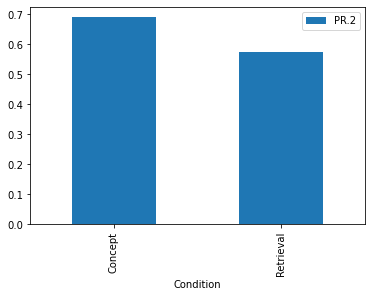

In [2]:
# df[['Condition', 'PR.2']].head()

# Average the PR.2 predictions of each group
df_pred = df.pivot_table(values=['PR.2'], index=['Condition'])
df_pred
df_pred.plot.bar()

**YOUR EXPLANATION HERE**

From the table and graph, we can that on average the participants that made concept maps believed they learned more and would perform better on the second test. 

# Question 2

Which group actually did better on the follow-up learning test one week later? Make an appropriate visualization and explain what you see.

_Hint:_ Don't ask which variable you should use. That is for you to figure out. Read the codebook carefully (consulting the [original paper](http://science.sciencemag.org/content/331/6018/772), if necessary), make an informed decision, and explain your choice.

,TS.avg
Condition,
Concept,0.468846
Retrieval,0.616471


<AxesSubplot:xlabel='Condition'>

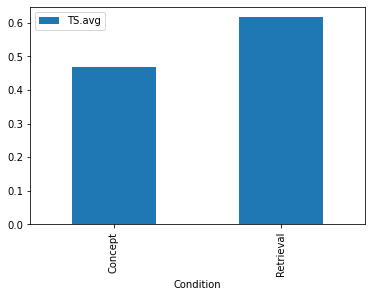

In [6]:
# df[['Condition', 'TS.2']]

# Calculate the average score on the second test based on condition
df_ts2 = df.pivot_table(values=['TS.avg'], index=['Condition'])
df_ts2
df_ts2.plot.bar()

**YOUR EXPLANATION HERE**

Contrary to the predictions, we can see that on average those that practiced retrieval performed better than those that made concept maps.

# Question 3

How good were subjects at predicting how well they would do on the follow-up learning test? Calculate a measure of how well subjects predicted their performance and interpret the value in context. (Optionally, you may want to include a visualization as well.)

,Condition,PR.2,TS.avg
0,Concept,0.80,0.39
1,Concept,0.70,0.42
2,Concept,0.70,0.08
3,Concept,0.70,0.43
4,Concept,0.95,0.27


,Condition,PR.2,TS.avg,% Error
0,Concept,0.80,0.39,105.13
1,Concept,0.70,0.42,66.67
2,Concept,0.70,0.08,775.00
3,Concept,0.70,0.43,62.79
4,Concept,0.95,0.27,251.85


,% Error
Condition,
Concept,100.065385
Retrieval,34.320588


<AxesSubplot:xlabel='Condition'>

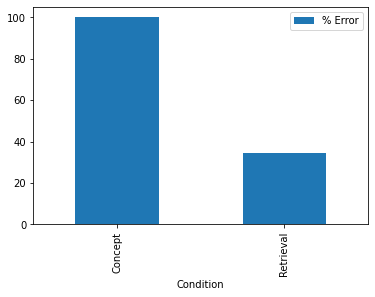

In [8]:
df[['Condition', 'PR.2', 'TS.avg']].head()

# Calculate percent error of predicted score vs. actual score and store in new column
df['% Error'] = round(abs((df['TS.avg'] - df['PR.2']) / df['TS.avg']) * 100, 2)
df[['Condition', 'PR.2', 'TS.avg', '% Error']].head()

# Average percent error for predictions
df_error = df.pivot_table(values=['% Error'], index=['Condition'])
df_error
df_error.plot.bar()

**YOUR EXPLANATION HERE**

To see how well subjects were able to predict their score, we performed a percent error calculation using their predicted score and actual score, then calculated the average among each group. As a result, we can see that those that practiced retrieval were better at predicting their score since the average percent error is lower.

# Question 4

This was a completely randomized experiment. This means that the condition that each subject was assigned to should be independent of their gender, age, and any other subject characteristics. Does that seem to be true in this case? Calculate a summary measure and/or make a visualization, and explain what you see.

In [5]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

cond_gender = pd.crosstab(df['Condition'], df['Gender'])
cond_gender
chi, p, dfree, expected = chi2_contingency(cond_gender)
print("Null hypothesis: condition and gender are independent")
print("chi square value: " ,chi)
print("p value: ", p)
print("degree of freedom: ", dfree)
print("expected frequencies when condition and gender are independent: ", expected)
print("for 1 degree of freedom, the chi-square valued needed to reject the hypothesis at the 0.001 significance level:")
chi2.ppf(0.999, 1)

print('==================================================')

cond_age = pd.crosstab(df['Condition'], df['Age'])
cond_age
chi, p, dfree, expected = chi2_contingency(cond_age)
print("Null hypothesis: condition and age are independent")
print("chi square value: " ,chi)
print("p value: ", p)
print("degree of freedom: ", dfree)
print("expected frequencies when condition and age are independent: ", expected)
print("for 5 degrees of freedom, the chi-square valued needed to reject the hypothesis at the 0.001 significance level:")
chi2.ppf(0.999, 5)

Gender,Female,Male
Condition,,
Concept,9,17
Retrieval,12,5


Null hypothesis: condition and gender are independent
chi square value:  3.9811597716009475
p value:  0.04601187213054677
degree of freedom:  1
expected frequencies when condition and gender are independent:  [[12.69767442 13.30232558]
 [ 8.30232558  8.69767442]]
for 1 degree of freedom, the chi-square valued needed to reject the hypothesis at the 0.001 significance level:


10.827566170662733

Age,17,18,19,20,21,22
Condition,,,,,,
Concept,0,11,8,5,2,0
Retrieval,1,3,6,4,2,1


Null hypothesis: condition and age are independent
chi square value:  5.317478273360626
p value:  0.37837518738653036
degree of freedom:  5
expected frequencies when condition and age are independent:  [[0.60465116 8.46511628 8.46511628 5.44186047 2.41860465 0.60465116]
 [0.39534884 5.53488372 5.53488372 3.55813953 1.58139535 0.39534884]]
for 5 degrees of freedom, the chi-square valued needed to reject the hypothesis at the 0.001 significance level:


20.515005652432873

**YOUR EXPLANATION HERE**

Since the chi square values of both tests are less than their respective significance values we cannot reject the null hypotheses. Note: this does not mean we accept it, just that we cannot reject it. 

In the context of this problem, this means that there is not information to tell if the condition that each subject was assigned to was independent of their gender and age.

# Submission Instructions

Once you are finished, follow these steps:

1. Restart the kernel and re-run this notebook from beginning to end by going to `Kernel > Restart Kernel and Run All Cells`.
2. If this process stops halfway through, that means there was an error. Correct the error and repeat Step 1 until the notebook runs from beginning to end.
3. Double check that there is a number next to each code cell and that these numbers are in order.

Then, submit your lab as follows:

1. Go to `File > Export Notebook As > PDF`.
2. Double check that the entire notebook, from beginning to end, is in this PDF file. (If the notebook is cut off, try first exporting the notebook to HTML and printing to PDF.)
3. Upload the PDF to Gradescope and Notebook (ipynb) to iLearn.